<a href="https://colab.research.google.com/github/QuanRy/TPR_L4/blob/main/lab4_TPR_Pandas_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 4 по дисциплине "Технологии программирования"
# **2 вариант**

Подключаем необходимые библиотеки:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Скачиваем датасет с информацией о пассажирах Титаника:

In [2]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2024-12-23 01:01:54--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.07s   

2024-12-23 01:01:54 (581 KB/s) - ‘titanic.csv’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [3]:
!ls

sample_data  titanic.csv


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [16]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [17]:
missing_values = df.isnull().any()
print(missing_values)

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool


Значит, что все столбцы в нашем DataFrame не содержат пропущенных значений (NaN). То есть в каждом столбце все значения присутствуют.

2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
###  2. **Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.**
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [18]:
second_class_with_family = df[(df['Pclass'] == 2) & (df['Parents/Children Aboard'] > 0)]

count = second_class_with_family.shape[0]
print(f"Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми: {count}")


Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми: 50


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

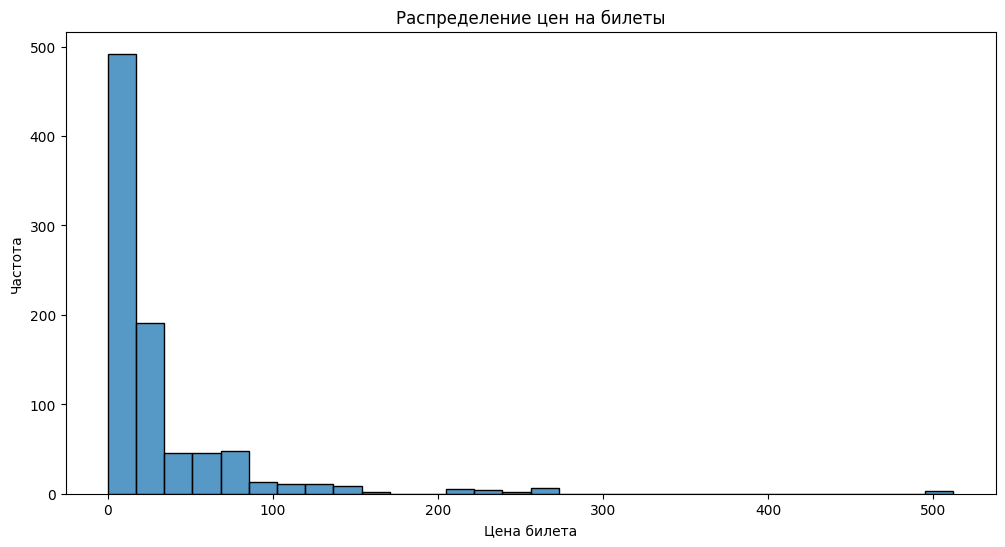

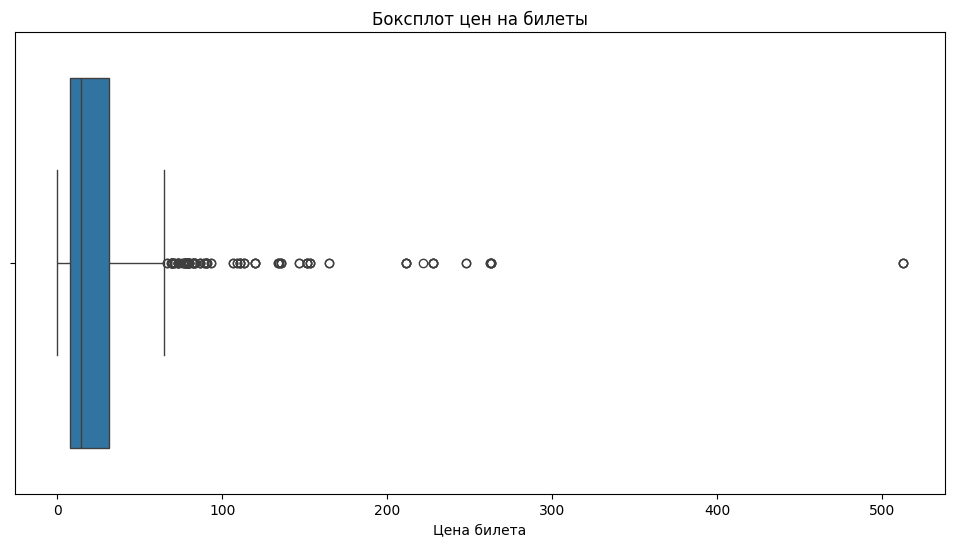

In [13]:
# Гистограмма
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Распределение цен на билеты')
plt.xlabel('Цена билета')
plt.ylabel('Частота')
plt.show()
print()

# Ящик с усами (боксплот)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fare', data=df)
plt.title('Боксплот цен на билеты')
plt.xlabel('Цена билета')
plt.show()

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.
###  2. **Мужчинам в катастрофе выжить проще.**
  3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
  4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
  5. Чем больше родственников у чаловека, тем выше его шанс погибнуть.

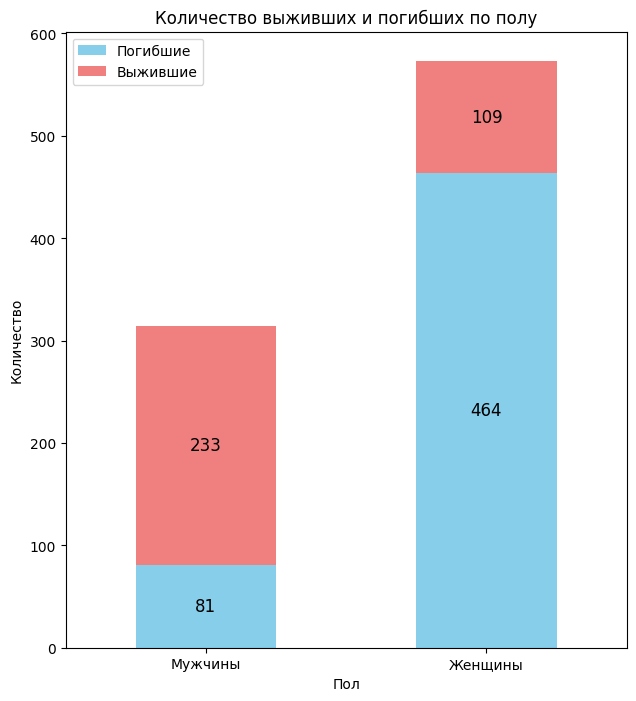

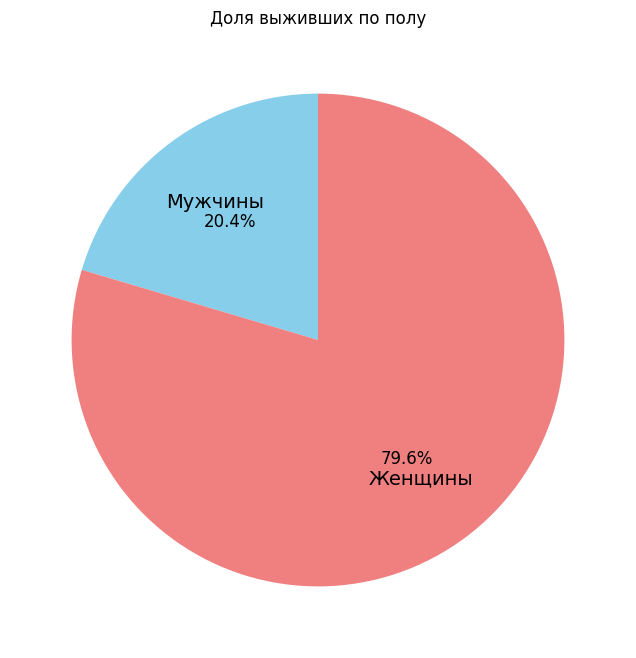

Количество выживших мужчин: 109
Количество выживших женщин: 233
Доля выживших мужчин: 0.19
Доля выживших женщин: 0.74
Женщинам было проще выжить.


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Общее количество мужчин и женщин
total_men = df[df['Sex'] == 'male'].shape[0]
total_women = df[df['Sex'] == 'female'].shape[0]

# Количество выживших мужчин и женщин
survived_men = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
survived_women = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]

# Доля выживших для каждого пола
survival_rate_men = survived_men / total_men
survival_rate_women = survived_women / total_women

# Группировка выживших и погибших по полу
survived_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

# Гистограмма: выжившие vs погибшие по полу
ax = survived_by_sex.plot(kind='bar', stacked=True, figsize=(7.24, 8), color=['skyblue', 'lightcoral'])

# Добавляем количество выживших и погибших к части гистограммы
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=12, color='black')

# Подпись и легенда
plt.title('Количество выживших и погибших по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Мужчины', 'Женщины'], rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.show()

# Круговая диаграмма доли выживших по полу
plt.figure(figsize=(8, 8))
survival_rates = pd.Series([survival_rate_men, survival_rate_women], index=['Мужчины', 'Женщины'])
wedges, texts, autotexts = plt.pie(
    survival_rates,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    textprops={'fontsize': 12}
)

# Добавление подписей "Мужчины" и "Женщины" на сам график
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.radians(angle))
    y = 0.7 * np.sin(np.radians(angle))
    plt.text(x, y, survival_rates.index[i], ha='center', va='center', fontsize=14, color='black')

plt.title('Доля выживших по полу')
plt.show()

# Вывод статистики
print(f"Количество выживших мужчин: {survived_men}")
print(f"Количество выживших женщин: {survived_women}")
print(f"Доля выживших мужчин: {survival_rate_men:.2f}")
print(f"Доля выживших женщин: {survival_rate_women:.2f}")


# Вывод результата
if survival_rate_men > survival_rate_women:
    print("Мужчинам было проще выжить.")
else:
    print("Женщинам было проще выжить.")


На основании резульатов выше, мы принимаем утверждение в задании за ложное, т.к. по статистике мужчины погибают при катастрофах чаще.

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [19]:
df = df.drop('Name', axis=1)
print(df.head())

   Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0         0       3    male  22.0                        1   
1         1       1  female  38.0                        1   
2         1       3  female  26.0                        0   
3         1       1  female  35.0                        1   
4         0       3    male  35.0                        0   

   Parents/Children Aboard     Fare  
0                        0   7.2500  
1                        0  71.2833  
2                        0   7.9250  
3                        0  53.1000  
4                        0   8.0500  


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [20]:
df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
print(df_encoded.head())

   Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0       3  22.0                        1                        0   
1         1       1  38.0                        1                        0   
2         1       3  26.0                        0                        0   
3         1       1  35.0                        1                        0   
4         0       3  35.0                        0                        0   

      Fare  Sex_female  Sex_male  
0   7.2500       False      True  
1  71.2833        True     False  
2   7.9250        True     False  
3  53.1000        True     False  
4   8.0500       False      True  


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

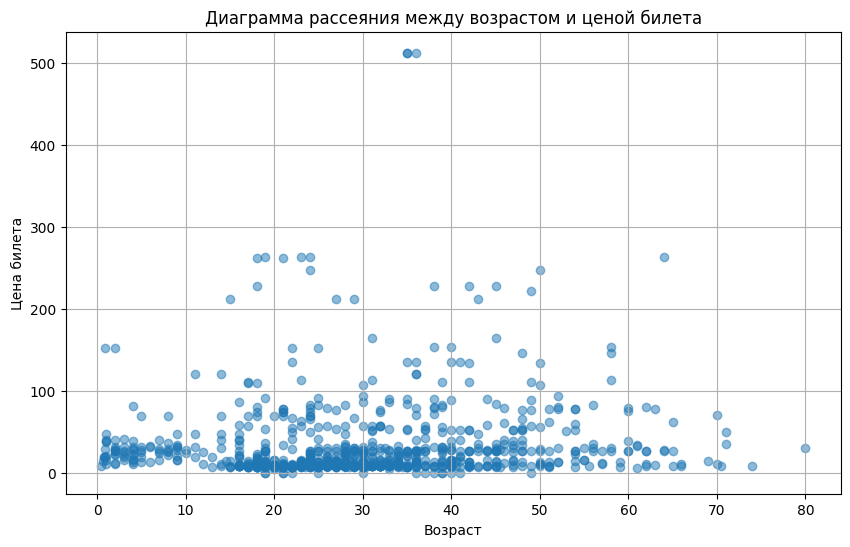

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Диаграмма рассеяния между возрастом и ценой билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.grid(True)
plt.show()

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [22]:
scaler = MinMaxScaler()

# Обучаем scaler и одновременно трансформируем колонки 'Age' и 'Fare'
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df.head())

   Survived  Pclass     Sex       Age  Siblings/Spouses Aboard  \
0         0       3    male  0.271174                        1   
1         1       1  female  0.472229                        1   
2         1       3  female  0.321438                        0   
3         1       1  female  0.434531                        1   
4         0       3    male  0.434531                        0   

   Parents/Children Aboard      Fare  
0                        0  0.014151  
1                        0  0.139136  
2                        0  0.015469  
3                        0  0.103644  
4                        0  0.015713  


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

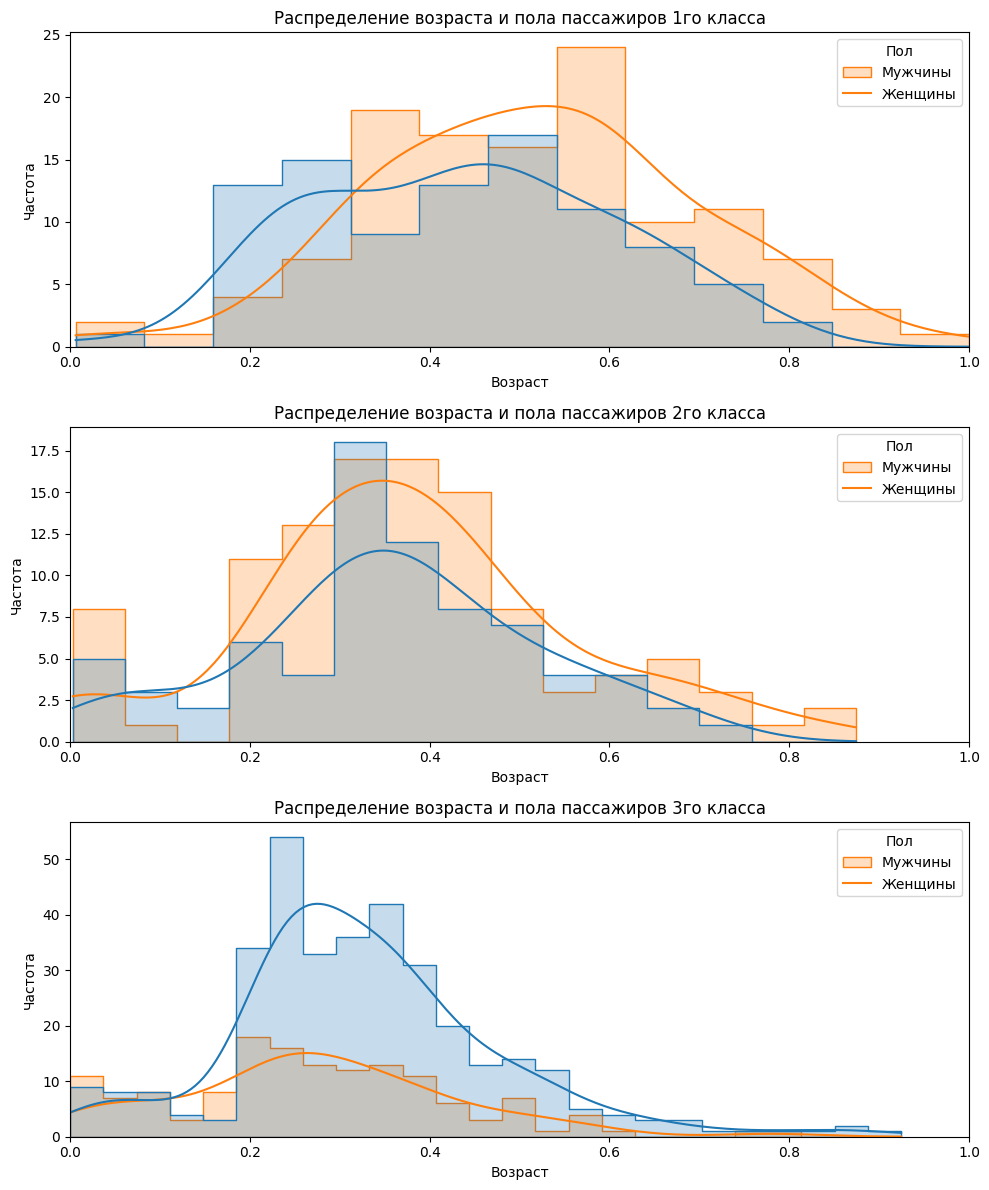

In [23]:
plt.figure(figsize=(10, 12))

# Для каждого класса создаем подграфик
for i, pclass in enumerate(sorted(df['Pclass'].unique()), start=1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df[df['Pclass'] == pclass], x='Age', hue='Sex', element="step", common_norm=False, kde=True)
    plt.title(f'Распределение возраста и пола пассажиров {pclass}го класса')
    plt.xlabel('Возраст')
    plt.ylabel('Частота')
    plt.legend(title='Пол', labels=['Мужчины', 'Женщины'])
    plt.xlim(0, df['Age'].max())

plt.tight_layout()
plt.show()

10. Сделайте выводы по работе.

## Выводы:

1. Изучил библиотеки Python: NumPy, Pandas и Matplotlib.
Освоил работу в Jupyter Notebook на платформе Google Colab.
2. Научился выполнять векторные вычисления с NumPy.
3. Овладел навыками анализа, обработки и визуализации
4. данных с Pandas и Matplotlib.